In [1]:
import pandas as pd
pd.options.display.max_rows = 60
pd.options.display.max_columns = 30

In [2]:
movies_df = pd.read_csv( "movie_metadata.csv" )

In [3]:
#check column labels
movies_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
#drop labels we aren't likely interested in
movies_df.drop( labels = [ 'color', 'duration', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'language',
                       'content_rating', 'aspect_ratio', 'num_critic_for_reviews', 'num_user_for_reviews', 'budget' ],
            axis = 1, inplace = True )

In [5]:
#rearrange column labels
movies_df = movies_df [ [ 'movie_title', 'title_year', 'country', 'gross', 'director_name', 'director_facebook_likes',
               'actor_1_name', 'actor_1_facebook_likes', 'actor_2_name', 'actor_2_facebook_likes', 'actor_3_name',
               'actor_3_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes', 'imdb_score', 'num_voted_users',
               'genres' ] ]

In [6]:
#drop movies where actors and directors with 0 likes
movies_df = movies_df.drop(movies_df[movies_df.actor_1_facebook_likes == 0].index)
movies_df = movies_df.drop(movies_df[movies_df.actor_2_facebook_likes == 0].index)
movies_df = movies_df.drop(movies_df[movies_df.actor_3_facebook_likes == 0].index)
movies_df = movies_df.drop(movies_df[movies_df.director_facebook_likes == 0].index)

In [7]:
#drop movies not in the US
movies_df = movies_df.drop( movies_df[movies_df.country != 'USA'].index )
#view number of rows left
movies_df.shape

(3106, 17)

In [8]:
#checking if genres type and title type are string
print(isinstance((movies_df.loc[1, 'genres']), str))
print(isinstance((movies_df.loc[1, 'movie_title']), str))

True
True


In [9]:
#check if any of the genres entries is null, in this case none are so we don't have to worry about that in the next step
movies_df.genres.isnull().sum()

0

In [10]:
#genres:
#consider each genre seperately: extract genres delimited by "|" (pipeline)

#this variable will store all genres in the movie dataset
genre_dict = {}

#sample if need to test. Note: not 50 entries because we dropped certain rows & some of the indeces from 0-49 were dropped
#test = pd.DataFrame(movies.loc[0:49])


#change this back to movies.genres
for genres in movies_df.genres:
    #remove spaces from string so that something like "Action " vs " Action" are not treated differently
    genres_no_space = genres.strip()
    #need to extract genre by delimiter |
    genres_list = genres_no_space.split("|")
    
    #this block of code adds the genre as a key in dictionary and updates the count
    for genre in genres_list:
        
        #the key exists and we want to increment the count for movies with this genre
        if genre in genre_dict:
            genre_dict[genre] = genre_dict.get(genre) + 1   
        else: #add this genre if it doesn't already exist in the dict
            key_value = {genre : 1}
            genre_dict.update(key_value)

In [11]:
#REMEMBER: only loop once per row checking every dict entry

#list where we will store the genres. This is just convenient to have
genre_list = []
#add dictionary keys (genres) into our genre_list
for key in genre_dict:
    #don't add any genres whose corresponding movies count is less than 20, due to statistical insignificance
    if genre_dict[key] >= 20:
        genre_list.append(key)

#list where we will store all the movie titles. This is made to create index column of dataframe
movie_title_list = []
for title in movies_df.movie_title:
    movie_title_list.append(title)

#create the df whose columns titles are genres, and index is movie titles
movie_genre_df = pd.DataFrame(index = movie_title_list, columns = genre_list)
movie_genre_df.index.name = 'MovieTitle'

#fill the columns with 1 or 0, where 1 serves to tell us the movie belongs to the genre in the column title and 0 otherwise
for movie in movies_df.index:
    #current title of movie
    title = movies_df.movie_title.loc[movie]
    #current genre string of movie
    genres_str = movies_df.genres.loc[movie]
    
    #We have a genre list from previous code. We can loop over list and check if
    # current movie has certain genres. Note: will need movie title and genre
    for genre in genre_list:      
        #returns positive index of where substring was found in string, -1 if not found
        i = genres_str.find(genre)
        #if the genre is contained in the string then make the column corresponding to
        #this genre and this title in the movies_genre_df to 1 otherwise make it 0  
        if i >= 0:
            movie_genre_df.at[title, genre] = 1
        else:
            movie_genre_df.at[title, genre] = 0

In [12]:
#check movie_df
movies_df

,movie_title,title_year,country,gross,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,num_voted_users,genres
1,Pirates of the Caribbean: At World's End,2007.0,USA,309404152.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,7.1,471220,Action|Adventure|Fantasy
3,The Dark Knight Rises,2012.0,USA,448130642.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,106759,164000,8.5,1144337,Action|Thriller
5,John Carter,2012.0,USA,73058679.0,Andrew Stanton,475.0,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,530.0,1873,24000,6.6,212204,Action|Adventure|Sci-Fi
7,Tangled,2010.0,USA,200807262.0,Nathan Greno,15.0,Brad Garrett,799.0,Donna Murphy,553.0,M.C. Gainey,284.0,2036,29000,7.8,294810,Adventure|Animation|Comedy|Family|Fantasy|Musi...
13,Pirates of the Caribbean: Dead Man's Chest,2006.0,USA,423032628.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48486,5000,7.3,522040,Action|Adventure|Fantasy
14,The Lone Ranger,2013.0,USA,89289910.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Ruth Wilson,2000.0,Tom Wilkinson,1000.0,45757,48000,6.5,181792,Action|Adventure|Western
16,The Chronicles of Narnia: Prince Caspian,2008.0,USA,141614023.0,Andrew Adamson,80.0,Peter Dinklage,22000.0,Pierfrancesco Favino,216.0,Damián Alcázar,201.0,22697,0,6.6,149922,Action|Adventure|Family|Fantasy
18,Pirates of the Caribbean: On Stranger Tides,2011.0,USA,241063875.0,Rob Marshall,252.0,Johnny Depp,40000.0,Sam Claflin,11000.0,Stephen Graham,1000.0,54083,58000,6.7,370704,Action|Adventure|Fantasy
19,Men in Black 3,2012.0,USA,179020854.0,Barry Sonnenfeld,188.0,Will Smith,10000.0,Michael Stuhlbarg,816.0,Nicole Scherzinger,718.0,12572,40000,6.8,268154,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi
21,The Amazing Spider-Man,2012.0,USA,262030663.0,Marc Webb,464.0,Emma Stone,15000.0,Andrew Garfield,10000.0,Chris Zylka,963.0,28489,56000,7.0,451803,Action|Adventure|Fantasy


In [13]:
#check movie_genre_df
movie_genre_df

,Action,Adventure,Fantasy,Thriller,Sci-Fi,Animation,Comedy,Family,Musical,Romance,Western,Sport,Horror,Crime,Drama,Mystery,History,War,Biography,Music,Documentary
MovieTitle,,,,,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: At World's End,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Dark Knight Rises,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
John Carter,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tangled,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0
Pirates of the Caribbean: Dead Man's Chest,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Lone Ranger,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
The Chronicles of Narnia: Prince Caspian,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Pirates of the Caribbean: On Stranger Tides,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Men in Black 3,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#note that this shows we have null values in original movie dataset
movies_df.isnull().any(axis = 1).sum()
#TODO: next step is to deal with nulls

451

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


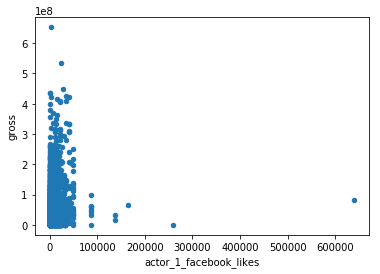

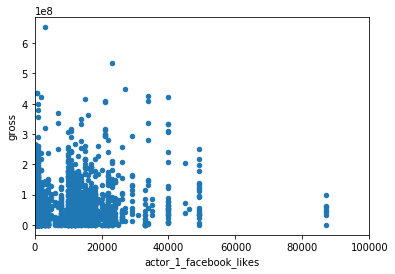

In [16]:
#Scatterplot for actor1_facebook_likes and movie gross
scatter1 = movies_df.plot.scatter(x = "actor_1_facebook_likes", y = "gross")
scatter1Mod = movies_df.plot.scatter(x = "actor_1_facebook_likes", y = "gross")
print(scatter1)

#Actual limit 600000. Few outliers beyond 100000, removing for better view of scatterplot
scatter1Mod.set_xlim([0, 100000])
print(scatter1Mod)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


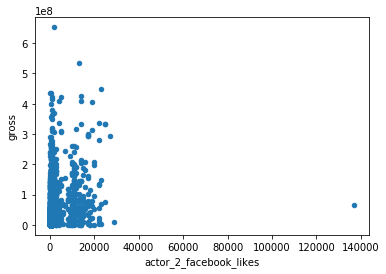

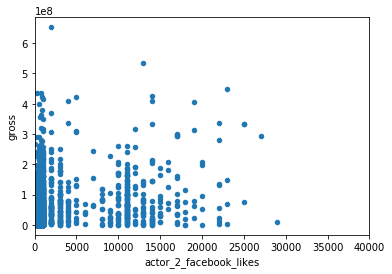

In [17]:
#Scatterplot for actor2_facebook_likes and movie gross
scatter2 = movies_df.plot.scatter(x = "actor_2_facebook_likes", y = "gross")
scatter2Mod = movies_df.plot.scatter(x = "actor_2_facebook_likes", y = "gross")
print(scatter2)

#Actual limit 140000. Few outliers beyond 40000, removing for better view of scatterplot
scatter2Mod.set_xlim([0, 40000])
print(scatter2Mod)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


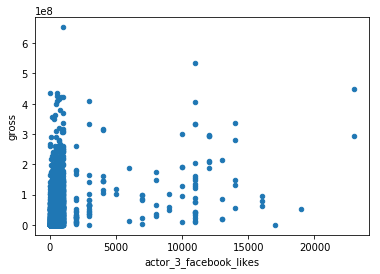

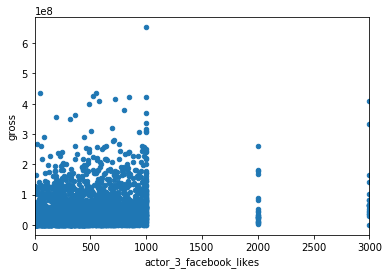

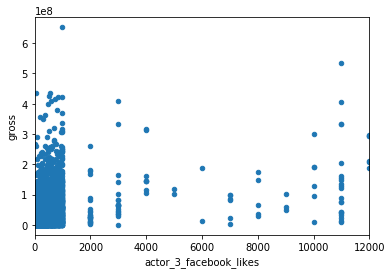

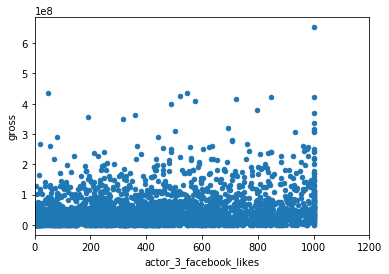

In [18]:
#Scatterplot for actor3_facebook_likes and movie gross
scatter3 = movies_df.plot.scatter(x = "actor_3_facebook_likes", y = "gross")
scatter3Mod1 = movies_df.plot.scatter(x = "actor_3_facebook_likes", y = "gross")
scatter3Mod2 = movies_df.plot.scatter(x = "actor_3_facebook_likes", y = "gross")
scatter3Mod3 = movies_df.plot.scatter(x = "actor_3_facebook_likes", y = "gross")


print(scatter3)

#No notable outliers. Reducing Xlim to display more accurate scatter plot views
scatter3Mod1.set_xlim([0, 3000])
scatter3Mod2.set_xlim([0, 12000])
scatter3Mod3.set_xlim([0, 1200])


print(scatter3Mod1)
print(scatter3Mod2)

AxesSubplot(0.125,0.125;0.775x0.755)


,movie_title,title_year,country,gross,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,num_voted_users,genres
1,Pirates of the Caribbean: At World's End,2007.0,USA,309404152.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,7.1,471220,Action|Adventure|Fantasy
3,The Dark Knight Rises,2012.0,USA,448130642.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,106759,164000,8.5,1144337,Action|Thriller
5,John Carter,2012.0,USA,73058679.0,Andrew Stanton,475.0,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,530.0,1873,24000,6.6,212204,Action|Adventure|Sci-Fi
7,Tangled,2010.0,USA,200807262.0,Nathan Greno,15.0,Brad Garrett,799.0,Donna Murphy,553.0,M.C. Gainey,284.0,2036,29000,7.8,294810,Adventure|Animation|Comedy|Family|Fantasy|Musi...
13,Pirates of the Caribbean: Dead Man's Chest,2006.0,USA,423032628.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48486,5000,7.3,522040,Action|Adventure|Fantasy


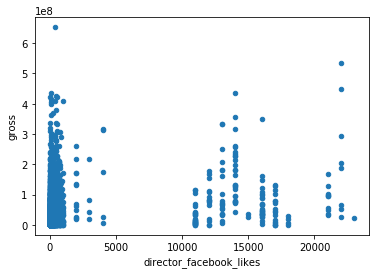

In [19]:
#Scatterplot for director_facebook_likes and movie gross
directScatter = movies_df.plot.scatter(x = "director_facebook_likes", y = "gross")

print(directScatter)
movies_df.head()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

#Regression Model for Actor 1 likes and gross income of movie

outcome_1, predictors_1 = patsy.dmatrices('gross ~ actor_1_facebook_likes',movies_df)
mod_1 = sm.OLS (outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     43.94
Date:                Wed, 29 May 2019   Prob (F-statistic):           4.08e-11
Time:                        12:06:13   Log-Likelihood:                -51534.
No. Observations:                2656   AIC:                         1.031e+05
Df Residuals:                    2654   BIC:                         1.031e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.96

In [23]:
#Changing like values of actor 1 using log10
movies_df['actor_1_facebook_likes'] = np.log10(movies_df['actor_1_facebook_likes'])

In [24]:
#Regression model for Actor 1 likes (log10) and gross income of movie
outcome_1log, predictors_1log = patsy.dmatrices('gross ~ actor_1_facebook_likes',movies_df)
mod_1log = sm.OLS (outcome_1log,predictors_1log)
res_1log = mod_1log.fit()
print(res_1log.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 29 May 2019   Prob (F-statistic):           4.19e-37
Time:                        12:07:49   Log-Likelihood:                -51475.
No. Observations:                2656   AIC:                         1.030e+05
Df Residuals:                    2654   BIC:                         1.030e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2.33

In [43]:
#Test for normality. Low p-val = not normally distributed
teststat1, pval1 = stats.normaltest(movies_df.dropna()['actor_1_facebook_likes'])
if pval1 < .01:
    print ('Log10 Actor 1 likes is not normally distributed')
else:
    print ('Log10 Actor 1 likes is normally distributed')
print ('The p-value is',pval1)

Log10 Actor 1 likes is not normally distributed
The p-value is 2.4156162622634288e-57


AxesSubplot(0.125,0.125;0.775x0.755)


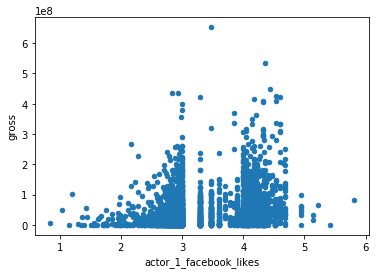

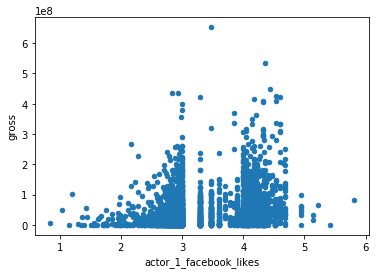

In [25]:
#Scatterplot for log10 Actor 1 Likes
scatter1 = movies_df.plot.scatter(x = "actor_1_facebook_likes", y = "gross")
scatter1Mod = movies_df.plot.scatter(x = "actor_1_facebook_likes", y = "gross")
print(scatter1)

In [52]:
#Changing like values of actor 2 using log10
movies_df['actor_2_facebook_likes'] = np.log10(movies_df['actor_2_facebook_likes'])

In [53]:
#Regression model for Actor 2 likes (log10) and gross income of movie
outcome_2log, predictors_2log = patsy.dmatrices('gross ~ actor_2_facebook_likes',movies_df)
mod_2log = sm.OLS (outcome_2log,predictors_2log)
res_2log = mod_2log.fit()
print(res_2log.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     218.0
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.77e-47
Time:                        12:44:00   Log-Likelihood:                -51451.
No. Observations:                2656   AIC:                         1.029e+05
Df Residuals:                    2654   BIC:                         1.029e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.82

In [54]:
#Test for normality. Low p-val = not normally distributed
teststat2, pval2 = stats.normaltest(movies_df.dropna()['actor_2_facebook_likes'])
if pval2 < .01:
    print ('Log10 Actor 2 likes is not normally distributed')
else:
    print ('Log10 Actor 2 likes is normally distributed')
print ('The p-value is',pval2)

Log10 Actor 2 likes is not normally distributed
The p-value is 2.521172417478561e-32


AxesSubplot(0.125,0.125;0.775x0.755)


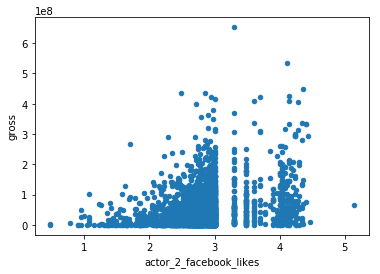

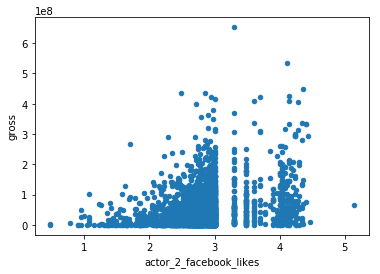

In [55]:
#Scatterplot for log10 Actor 2 Likes
scatter2 = movies_df.plot.scatter(x = "actor_2_facebook_likes", y = "gross")
scatter2Mod = movies_df.plot.scatter(x = "actor_2_facebook_likes", y = "gross")
print(scatter2)

In [56]:
#Changing like values of actor 3 using log10
movies_df['actor_3_facebook_likes'] = np.log10(movies_df['actor_3_facebook_likes'])

In [57]:
#Regression model for Actor 3 likes (log10) and gross income of movie
outcome_3log, predictors_3log = patsy.dmatrices('gross ~ actor_3_facebook_likes',movies_df)
mod_3log = sm.OLS (outcome_3log,predictors_3log)
res_3log = mod_3log.fit()
print(res_3log.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     194.4
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.09e-42
Time:                        12:46:45   Log-Likelihood:                -51443.
No. Observations:                2655   AIC:                         1.029e+05
Df Residuals:                    2653   BIC:                         1.029e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -3.2

In [58]:
#Test for normality. Low p-val = not normally distributed
teststat3, pval3 = stats.normaltest(movies_df.dropna()['actor_3_facebook_likes'])
if pval3 < .01:
    print ('Log10 Actor 3 likes is not normally distributed')
else:
    print ('Log10 Actor 3 likes is normally distributed')
print ('The p-value is',pval3)

Log10 Actor 3 likes is not normally distributed
The p-value is 7.518349710147684e-81


AxesSubplot(0.125,0.125;0.775x0.755)


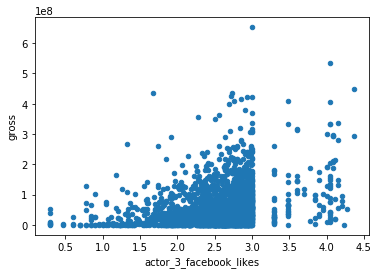

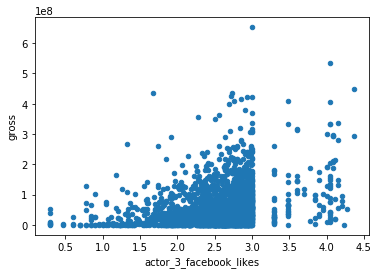

In [59]:
#Scatterplot for log10 Actor 3 Likes
scatter3 = movies_df.plot.scatter(x = "actor_3_facebook_likes", y = "gross")
scatter3Mod = movies_df.plot.scatter(x = "actor_3_facebook_likes", y = "gross")
print(scatter3)

In [62]:
#Multi-Regression model for all Actor likes (log10) and gross income of movie
outcome_3log, predictors_3log = patsy.dmatrices('gross ~ actor_3_facebook_likes + actor_2_facebook_likes + actor_1_facebook_likes',movies_df)
mod_3log = sm.OLS (outcome_3log,predictors_3log)
res_3log = mod_3log.fit()
print(res_3log.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     84.73
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.40e-52
Time:                        14:18:53   Log-Likelihood:                -51416.
No. Observations:                2655   AIC:                         1.028e+05
Df Residuals:                    2651   BIC:                         1.029e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.58

AxesSubplot(0.125,0.125;0.775x0.755)


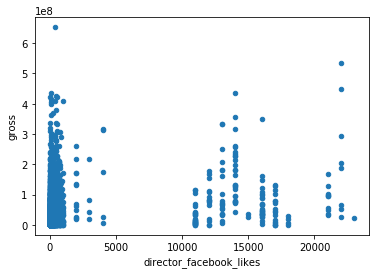

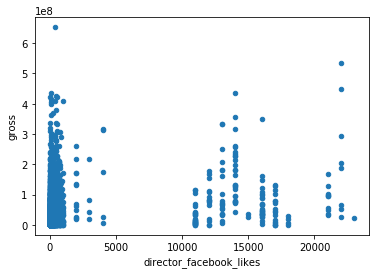

In [63]:
#Scatterplot for Director Likes
scatterD = movies_df.plot.scatter(x = "director_facebook_likes", y = "gross")
scatterDMod = movies_df.plot.scatter(x = "director_facebook_likes", y = "gross")
print(scatterD)

In [64]:
#Changing like values of director likes using log10
movies_df['director_facebook_likes'] = np.log10(movies_df['director_facebook_likes'])

AxesSubplot(0.125,0.125;0.775x0.755)


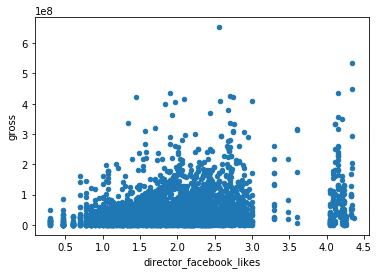

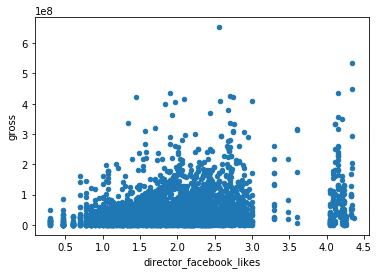

In [65]:
#Scatterplot for log10 Director Likes
scatterD = movies_df.plot.scatter(x = "director_facebook_likes", y = "gross")
scatterDMod = movies_df.plot.scatter(x = "director_facebook_likes", y = "gross")
print(scatterD)

In [66]:
#Test for normality. Low p-val = not normally distributed
teststatD, pvalD = stats.normaltest(movies_df.dropna()['director_facebook_likes'])
if pvalD < .01:
    print ('Log10 Director likes is not normally distributed')
else:
    print ('Log10 Director likes is normally distributed')
print ('The p-value is',pvalD)

Log10 Director likes is not normally distributed
The p-value is 1.9901741240297654e-49


In [67]:
#Regression model for Director likes (log10) and gross income of movie
outcome_Dlog, predictors_Dlog = patsy.dmatrices('gross ~ director_facebook_likes',movies_df)
mod_Dlog = sm.OLS (outcome_Dlog,predictors_Dlog)
res_Dlog = mod_Dlog.fit()
print(res_Dlog.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     250.4
Date:                Wed, 29 May 2019   Prob (F-statistic):           5.72e-54
Time:                        18:03:51   Log-Likelihood:                -51456.
No. Observations:                2657   AIC:                         1.029e+05
Df Residuals:                    2655   BIC:                         1.029e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6

In [70]:
#Extraction of P-value. Lower means it is statistically significant for a predictor
pvaldreg = res_Dlog.pvalues[1]
pvaldreg

5.724303375835575e-54

The Models have a low p-value which suggests that FB likes have a predictive power of gross income of a movie that is statistically significant. That being said, the R-squared is near zero. This means that the models do not account well for variance which makes them poor in the end result. With other variables that influence a movie's income, it makes sense as to why FB likes alone make for a poor model.